In [1]:
#playground.tensorflow.org

# Introduction to neural network classification with Tensorflow
**Classification:** Is where  you try to classify something as one thing or another.
1. Binary Classification
2. Multiple Classification
3. Multilabel Classification



# Creating data to view and fit


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy,BinaryCrossentropy

2023-03-09 11:40:53.457496: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-09 11:40:53.457552: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-09 11:40:55.545957: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-09 11:40:55.546354: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-09 11:40:55.546386: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [3]:
from sklearn.datasets import make_circles

#make 100 examples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [4]:
#check our features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
#check labels
y[:10]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Our data is a littel hard to understand now.Lets Visualize it !


In [6]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


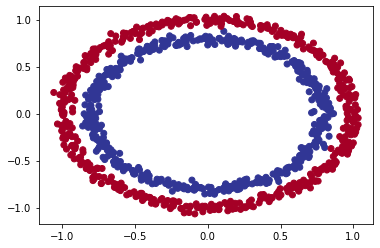

In [7]:
#visualise with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

## Input & Output  shapes


In [8]:
#check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
#how many samples we're working  with
len(X),len(y)

(1000, 1000)

In [10]:
#view the first examples of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modelling


The steps in modelling with TensorFlow are :
1. Create or import a model
2. Compile the model
3. Fit the model 
4. Evaluate the model
5. Tweak
6. Evalute
.
.
.

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Activation,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy,BinaryCrossentropy

In [12]:
from tensorflow.keras.layers import Flatten

In [13]:
#set random seed
tf.random.set_seed(42)

model=tf.keras.Sequential([
    Flatten(),
    Dense(units=5),
    Dense(units=2)
])

#compile it
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"]
             )


#fit model
model.fit(X,
          y,
          epochs=5
)

2023-03-09 11:41:00.005934: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-09 11:41:00.006408: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-09 11:41:00.006452: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylar-pc): /proc/driver/nvidia/version does not exist


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.5170 - accuracy: 0.5080
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.3724 - accuracy: 0.5060
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.3478 - accuracy: 0.5060
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 5.2438 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 5.1290 - accuracy: 0.4990


In [14]:
#improving model by training for longer
model.fit(X,y,epochs=200,verbose=0)

In [15]:
model.evaluate(X,y)#not right to evelaute with trainning data but just for experimental sake


32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4940


[0.6932040452957153, 0.49399998784065247]

since we're working on binary classification problem and our model is getting around ~50% accuracy .. it's performing as if it's guessing.


So let's step thing up a notch and add an extra layer


#model 1

In [16]:
#set random seed
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    
    Dense(units=10),
    Dense(units=2)
])

#compile it
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["accuracy"]
             )


#fit model
model_1.fit(X,
          y,
          epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.0728 - accuracy: 0.5070
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.5020
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5040
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4990
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4990
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5100
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5050
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4760
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4990
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5050
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4570
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5040
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4640
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4600
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4990
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5110
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4790
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5030
Epoch 93/100


The model seems to still be around a 50% accuracy so we still have to tweak
it 

# model 2

In [17]:
#seed
tf.random.set_seed(42)

#create model
model_2 = tf.keras.Sequential([
    Flatten(),
    Dense(units=100),
    Dense(units=10),
    Dense(units=1)
    
])


#compile it
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
            

)

# Fit MODEL
model_2.fit(X,
           y,
           epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 1.1580 - accuracy: 0.4330
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5030
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.4690
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.4830
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.5120
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.5280
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7011 - accuracy: 0.5020
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.5170
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7014 - accuracy: 0.4880
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.4600


# Model 3

In [18]:
tf.random.set_seed(42)

#Create model
model_3=tf.keras.Sequential([
    
    Dense(units=100,activation='relu'),
    Dense(units=10,activation='relu'),
    Dense(units=1)
    
])

#compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                

)

#fit model
History = model_3.fit(X,
                     y,
                     epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 4.3402 - accuracy: 0.5080
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


Text(0.5, 0, 'epochs')

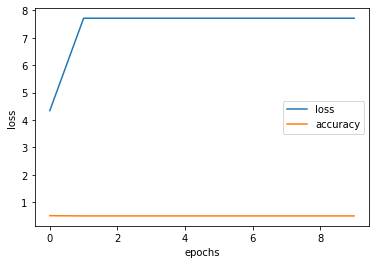

In [19]:
# PLOT HISTORY (also know as a loss curve or a training curve)
pd.DataFrame(History.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [20]:
X.shape,y.shape

((1000, 2), (1000,))

In [21]:
model_3.evaluate(X,y)#not right to evelaute with the same training data


32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

# Model 4

In [22]:
tf.random.set_seed(42)

#Create model
model_4=tf.keras.Sequential([
    Dense(units=10 ,activation='relu'),
    Dense(units=5,activation='relu'),
    Dense(units=1)
    
])

#compile model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                

)

#fit model
history=model_4.fit(X,
            y,
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.8613 - accuracy: 0.4560
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4680
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7055 - accuracy: 0.4260
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4910
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5330
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5640
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6640
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.6400
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.7080
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.6330
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 1.0000
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9990
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9980
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0388 - accuracy: 0.9990
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9990
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0368 - accuracy: 0.9980
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.9980
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9990
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9970
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9990
Epoch 93/100


In [23]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.9990


[0.02784080058336258, 0.9990000128746033]

Text(0.5, 0, 'epochs')

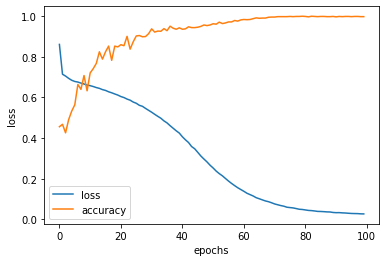

In [24]:
# PLOT HISTORY (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Model 5


In [25]:
tf.random.set_seed(42)

#Create model
model_5=tf.keras.Sequential([
    Dense(units=10,activation='relu'),
    Dense(units=5,activation='relu'),
    Dense(units=1)
    
])

#compile model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                

)

#fit model
history5=model_5.fit(X,
            y,
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.9195 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5140
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5370
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.5720
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.5610
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6020
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.6750
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6410
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.6720
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.6520
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9940
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0706 - accuracy: 0.9960
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0659 - accuracy: 0.9950
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9970
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9970
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0594 - accuracy: 0.9980
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9980
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9980
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9980
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9960
Epoch 93/100


In [26]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0814 - accuracy: 0.9820


[0.0813794732093811, 0.9819999933242798]

In [27]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                30        
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


# visualize some of its predictions


In [28]:
model_4.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[ 1.31156683e+00],
       [ 1.39197850e+00],
       [ 1.00086296e+00],
       [ 1.16065621e+00],
       [-2.56578326e-01],
       [ 9.82295811e-01],
       [ 1.19358325e+00],
       [ 1.28916657e+00],
       [ 1.03882265e+00],
       [-7.65487790e-01],
       [ 7.95931816e-01],
       [-5.52557588e-01],
       [ 8.65838587e-01],
       [ 1.00779998e+00],
       [ 1.04898357e+00],
       [ 1.31673670e+00],
       [-6.90408468e-01],
       [ 1.20653522e+00],
       [ 9.87417579e-01],
       [-1.41358256e-01],
       [ 1.30866385e+00],
       [-5.14456153e-01],
       [-4.52669144e-01],
       [ 1.36030352e+00],
       [-3.64572167e-01],
       [ 2.42177248e-01],
       [-3.07061553e-01],
       [ 9.68350530e-01],
       [ 1.09324789e+00],
       [ 1.06750345e+00],
       [ 4.17289734e-02],
       [-6.15384340e-01],
       [ 1.38209784e+00],
       [-1.94825053e-01],
       [-1.01885092e+00],
       [-3.70633364e-01],
       [ 1.20757365e+00],
       [ 8.84240031e-01],
       [ 1.2

# Visualization

 ***To viusalise our models prediction lets create a function 'plot_descision_boundary()', this function will:***
1. Take in a trained model , features X and label y
2. create a meshgred of the difference X values
3. make predictions accross the meshgid
4. Plot the predictions as  wel as a line  between  zones(where each unique class falls)

# useful modules
* meshgrid
* np.linspace
* np.c_


In [29]:
import numpy as np

In [30]:



def plot_decision_boundary(model,X,y):
    '''
    Plots the decision boundary created by a model prediction on X.
    '''
    #Define the axis boundaries of the  plot and create a meshgrid
    x_min,x_max= X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
    y_min,y_max= X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1
    
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
    
    
    #create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(),yy.ravel()]#stacks 2D arr together
    
    #make predictions
    y_pred= model.predict(x_in)
    
    
    #check for multi-class
    if len(y_pred[0])>1:
        print('doing multiclass classification')
        #we have to reshape our prediction to get them ready fro plotting
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    #Plot tthe decision boundry
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:,1], c=y , s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(), yy.max())
    
     

In [31]:
x_min,x_max= X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
y_min,y_max= X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1

x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [32]:
y_pred=model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


In [33]:
y_pred.shape

(1000, 1)

313/313 [==============================] - 0s 1ms/step
doing multiclass classification


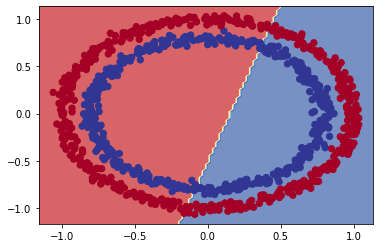

In [34]:
#check out the decisions predictions our model is making
plot_decision_boundary(model=model,
                       X=X,
                       y=y)

# Regression trial
***regression data***

In [35]:
#lets see if our model can be used for a regression problem


tf.random.set_seed(42)

#create Some reggression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100 ,1100, 5) # y = X + 100

#spliting our regression data into training and test
X_reg_train = X_regression[:150] #first 150
X_reg_test = X_regression[150:]#last 150
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]





In [36]:
X_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

# FITTING ERROR

In [37]:
#Fit  our model to the regression data
model_2.fit(X_reg_train,
           y_reg_train,  
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/mylar/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


In [ ]:
X_reg_train.shape,y_reg_train.shape

****We compiled  our model for a binary classification problem***
***But ...we're now working on a regression prob, lets change  the model  to suit our data***

In [38]:
# Set sed
tf.random.set_seed(42)

#create model
reg_model_1 = tf.keras.Sequential([
    Dense(units=100,input_shape=(1,)),
    Dense(units=10),
    Dense(units=1)
])
#compile model,this time with a regression specific loss fucntion

reg_model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']
)

#fit model
reg_model_1.fit(X_reg_train,
            y_reg_train,
            epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 425.8035 - mae: 425.8035
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 292.6353 - mae: 292.6353
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 164.1104 - mae: 164.1104
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 53.6954 - mae: 53.6954
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 84.2708 - mae: 84.2708
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 84.5378 - mae: 84.5378
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 49.6102 - mae: 49.6102
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 55.3553 - mae: 55.3553
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 48.3207 - mae: 48.3207
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 46.8784 - mae: 46.8784
Epoch 11/100
5/5 [==============================] - 0

5/5 [==============================] - 0s 3ms/step - loss: 38.6956 - mae: 38.6956
Epoch 88/100
5/5 [==============================] - 0s 3ms/step - loss: 38.8817 - mae: 38.8817
Epoch 89/100
5/5 [==============================] - 0s 4ms/step - loss: 38.4519 - mae: 38.4519
Epoch 90/100
5/5 [==============================] - 0s 3ms/step - loss: 38.3435 - mae: 38.3435
Epoch 91/100
5/5 [==============================] - 0s 3ms/step - loss: 38.6428 - mae: 38.6428
Epoch 92/100
5/5 [==============================] - 0s 3ms/step - loss: 38.2123 - mae: 38.2123
Epoch 93/100
5/5 [==============================] - 0s 3ms/step - loss: 39.0188 - mae: 39.0188
Epoch 94/100
5/5 [==============================] - 0s 3ms/step - loss: 39.1116 - mae: 39.1116
Epoch 95/100
5/5 [==============================] - 0s 3ms/step - loss: 38.3321 - mae: 38.3321
Epoch 96/100
5/5 [==============================] - 0s 3ms/step - loss: 38.6453 - mae: 38.6453
Epoch 97/100
5/5 [==============================] - 0s 3ms/step

In [39]:
# Set sed
tf.random.set_seed(42)

#create model
reg_model_2 = tf.keras.Sequential([
    Dense(units=100,input_shape=(1,),activation='relu'),
    Dense(units=10,activation='relu'),
    Dense(units=1)
])
#compile model,this time with a regression specific loss fucntion

reg_model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']
)

#fit model
reg_model_2.fit(X_reg_train,
            y_reg_train,
            epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 440.4485 - mae: 440.4485
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 419.8425 - mae: 419.8425
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 399.5642 - mae: 399.5642
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 379.3762 - mae: 379.3762
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 357.1356 - mae: 357.1356
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 329.9019 - mae: 329.9019
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 299.2315 - mae: 299.2315
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 261.6688 - mae: 261.6688
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 220.4341 - mae: 220.4341
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 173.9874 - mae: 173.9874
Epoch 11/100
5/5 [=====================

5/5 [==============================] - 0s 3ms/step - loss: 40.1618 - mae: 40.1618
Epoch 88/100
5/5 [==============================] - 0s 3ms/step - loss: 40.1015 - mae: 40.1015
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 40.0964 - mae: 40.0964
Epoch 90/100
5/5 [==============================] - 0s 3ms/step - loss: 40.0577 - mae: 40.0577
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 40.0058 - mae: 40.0058
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 39.9350 - mae: 39.9350
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 40.2830 - mae: 40.2830
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 39.8394 - mae: 39.8394
Epoch 95/100
5/5 [==============================] - 0s 3ms/step - loss: 40.2074 - mae: 40.2074
Epoch 96/100
5/5 [==============================] - 0s 3ms/step - loss: 40.0879 - mae: 40.0879
Epoch 97/100
5/5 [==============================] - 0s 2ms/step

2/2 [==============================] - 0s 3ms/step


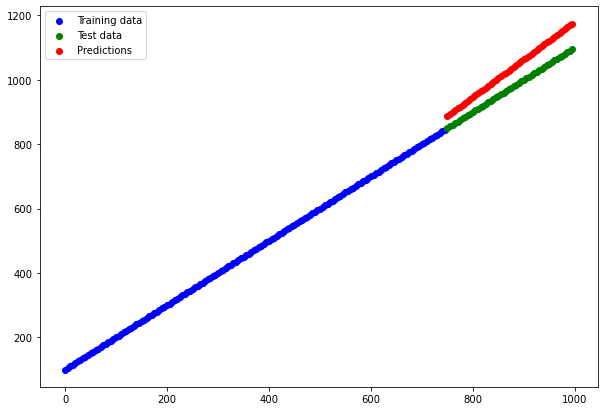

In [40]:
#Make predictions with trained  model

y_reg_pred = reg_model_1.predict(X_reg_test)

#plot the model's  predictions against our regression data

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c='b' , label="Training data")
plt.scatter(X_reg_test,y_reg_test, c='g' , label="Test data")
plt.scatter(X_reg_test,y_reg_pred, c='r' , label="Predictions")
plt.legend()

# Non-linearity

In [41]:
#set random seed
tf.random.set_seed(42)

#create the model
model_6=tf.keras.Sequential([
    Dense(units=1,activation="linear") 
])


#compile model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy']
)


In [42]:
#fit model
history=model_6.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4173 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.3334 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2780 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1822 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1675 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1702 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1566 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1303 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.0901 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.0737 - accuracy: 0.4750
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 4.4791 - accuracy: 0.4720
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4787 - accuracy: 0.4720
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4783 - accuracy: 0.4720
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4778 - accuracy: 0.4720
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4775 - accuracy: 0.4720
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4770 - accuracy: 0.4710
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4765 - accuracy: 0.4710
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4761 - accuracy: 0.4710
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4757 - accuracy: 0.4710
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4752 - accuracy: 0.4710
Epoch 93/100


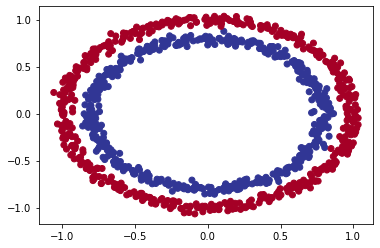

In [43]:
#check out our data
#first index of X and second index of X
plt.scatter(X[:,0],X[:,1 ],c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 856us/step
doing binary classification


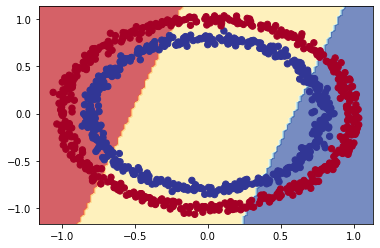

In [49]:
#Check decision boundary  for the latest model
plot_decision_boundary(model_6,X,y)

# Lets try build our  first Neural Network with a non -linear activation function


In [52]:
#set random seed
tf.random.set_seed(42)


#Build Model with a non-linear activation 
model_7=tf.keras.Sequential([
    Dense(units=1,activation="relu"),
    
])

#compile model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=(['accuracy'])
)

In [54]:
histotry=model_7.fit(X,y ,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3727 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3549 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3476 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3244 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2949 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2781 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2602 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2246 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2055 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1990 - accuracy: 0.4710
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.7822 - accuracy: 0.4910
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7800 - accuracy: 0.4910
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7779 - accuracy: 0.4920
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7758 - accuracy: 0.4920
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7738 - accuracy: 0.4920
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7717 - accuracy: 0.4930
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7698 - accuracy: 0.4930
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7678 - accuracy: 0.4940
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7659 - accuracy: 0.4940
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7640 - accuracy: 0.4950
Epoch 93/100


313/313 [==============================] - 0s 1ms/step
doing binary classification


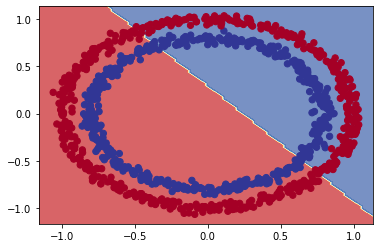

In [55]:
#Check decision boundary  for the latest model
plot_decision_boundary(model_7,X,y)

In [61]:
#Time to replicate the multi-layer neural network from Tensorflow Playground

#set the random seed 
tf.random.set_seed(42)

#create the model
model_8=tf.keras.Sequential([
    Dense(units=4,activation="relu"),
    Dense(units=2,activation="relu")
])

#compile model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
)

#fit model
history=model_8.fit(X,y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 6.0565 - accuracy: 0.5020
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 5.7280 - accuracy: 0.5010
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 5.3751 - accuracy: 0.5010
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 4.7726 - accuracy: 0.4910
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 4.4055 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 4.3851 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 4.3707 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 4.3592 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 4.3494 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 4.3409 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 4.2423 - accuracy: 0.5000
Epoch 84/200
32/32 [==============================] - 0s 2ms/step - loss: 4.2418 - accuracy: 0.5000
Epoch 85/200
32/32 [==============================] - 0s 2ms/step - loss: 4.2415 - accuracy: 0.5000
Epoch 86/200
32/32 [==============================] - 0s 2ms/step - loss: 4.2412 - accuracy: 0.5000
Epoch 87/200
32/32 [==============================] - 0s 2ms/step - loss: 4.2407 - accuracy: 0.5000
Epoch 88/200
32/32 [==============================] - 0s 2ms/step - loss: 4.2403 - accuracy: 0.5000
Epoch 89/200
32/32 [==============================] - 0s 2ms/step - loss: 4.2400 - accuracy: 0.5000
Epoch 90/200
32/32 [==============================] - 0s 2ms/step - loss: 4.2397 - accuracy: 0.5000
Epoch 91/200
32/32 [==============================] - 0s 2ms/step - loss: 4.2392 - accuracy: 0.5000
Epoch 92/200
32/32 [==============================] - 0s 2ms/step - loss: 4.2389 - accuracy: 0.5000
Epoch 93/200


32/32 [==============================] - 0s 2ms/step - loss: 4.2030 - accuracy: 0.5000
Epoch 165/200
32/32 [==============================] - 0s 2ms/step - loss: 4.2024 - accuracy: 0.5000
Epoch 166/200
32/32 [==============================] - 0s 2ms/step - loss: 4.2015 - accuracy: 0.5000
Epoch 167/200
32/32 [==============================] - 0s 2ms/step - loss: 4.2005 - accuracy: 0.5000
Epoch 168/200
32/32 [==============================] - 0s 2ms/step - loss: 4.1997 - accuracy: 0.5000
Epoch 169/200
32/32 [==============================] - 0s 2ms/step - loss: 4.1992 - accuracy: 0.5000
Epoch 170/200
32/32 [==============================] - 0s 2ms/step - loss: 4.1990 - accuracy: 0.5000
Epoch 171/200
32/32 [==============================] - 0s 2ms/step - loss: 4.1989 - accuracy: 0.5000
Epoch 172/200
32/32 [==============================] - 0s 2ms/step - loss: 4.1990 - accuracy: 0.5000
Epoch 173/200
32/32 [==============================] - 0s 2ms/step - loss: 4.1987 - accuracy: 0.5000
Epoc

313/313 [==============================] - 0s 1ms/step
doing multiclass classification


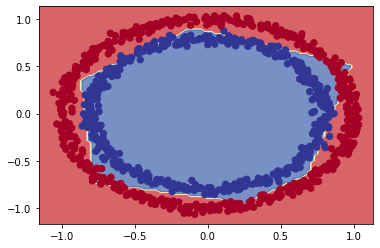

In [57]:
#Check decision boundary  for the latest model
plot_decision_boundary(model_8,X,y)

In [59]:
model_8.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2570 - accuracy: 0.9210


[0.2570030391216278, 0.9210000038146973]

# Lets change the out put layer activation function


In [62]:
#Time to replicate the multi-layer neural network from Tensorflow Playground

#set the random seed 
tf.random.set_seed(42)

#create the model
model_9=tf.keras.Sequential([
    Dense(units=4,activation="relu"),
    Dense(units=4,activation="relu"),
    Dense(units=1,activation="sigmoid")
])

#compile model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
)

#fit model
history=model_9.fit(X,y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5060
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5130
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5080
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5170
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5220
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5180
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5200
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5260
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5250
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5240
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.9370
Epoch 84/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.9550
Epoch 85/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.9460
Epoch 86/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.9600
Epoch 87/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.9500
Epoch 88/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.9520
Epoch 89/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.9580
Epoch 90/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.9530
Epoch 91/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.9650
Epoch 92/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.9700
Epoch 93/200


32/32 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.9930
Epoch 165/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.9900
Epoch 166/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9940
Epoch 167/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.9880
Epoch 168/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.9920
Epoch 169/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1423 - accuracy: 0.9920
Epoch 170/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1412 - accuracy: 0.9930
Epoch 171/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.9920
Epoch 172/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.9910
Epoch 173/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.9920
Epoc

In [63]:
model_9.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9930


[0.10537046939134598, 0.9929999709129333]

313/313 [==============================] - 0s 1ms/step
doing binary classification


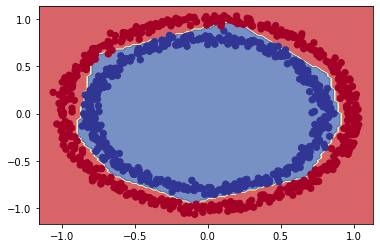

In [65]:
#Check decision boundary  for the latest model
plot_decision_boundary(model_9,X,y)

**Note:** The combination  of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

#create a toy tensor  (similar to the  data we pass into our models

In [66]:
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

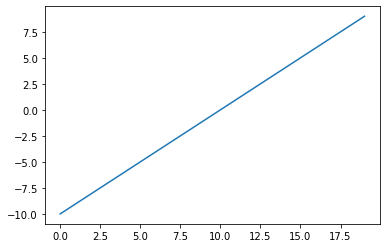

In [68]:
#visualize our tensor
plt.plot(A)

In [69]:
#let's start by replicating  sigmoid  -sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
    return 1 /(1+ tf.exp(-x))

#use sigmoid on our toy  tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

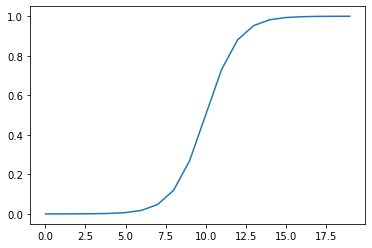

In [71]:
#Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [76]:
# Lets recreate the relu function
def relu(x):
    return tf.maximum(0,x)

In [77]:
#pass our toy data to the custom  relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

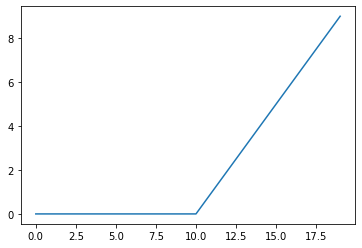

In [78]:
plt.plot(relu(A))

In [80]:
#lets  try linear  activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

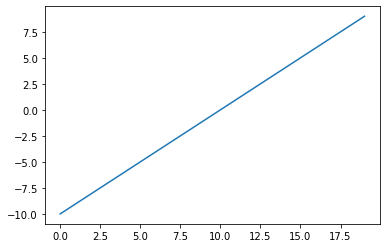

In [81]:
plt.plot(tf.keras.activations.linear(A))

In [82]:
#Does A even change
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>